In [1]:
from tensorflow.keras.datasets import mnist

2025-07-09 12:10:34.188113: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-09 12:10:34.188559: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-09 12:10:34.191324: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-09 12:10:34.198127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752081034.210326  117091 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752081034.21

In [13]:
print(f"x_train shape : {x_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"x_test shape  : {x_test.shape}")
print(f"y_test shape  : {y_test.shape}")

x_train shape : (60000, 28, 28)
y_train shape : (60000,)
x_test shape  : (10000, 28, 28)
y_test shape  : (10000,)


In [ ]:
print("label for first training example: ", y_train[0])
print("---beginning of pattern for first training example---")
for line in x_train[0]:
    for num in line:
        if num > 0:
            print("*", end=" ")
        else:
            print(" ", end=" ")
    print("")
print("---end of pattern for first training example")

label for first training example:  5
---beginning of pattern for first training example---
                                                        
                                                        
                                                        
                                                        
                                                        
                        * * * * * * * * * * * *         
                * * * * * * * * * * * * * * * *         
              * * * * * * * * * * * * * * * *           
              * * * * * * * * * * *                     
                * * * * * * *   * *                     
                  * * * * *                             
                      * * * *                           
                      * * * *                           
                        * * * * * *                     
                          * * * * * *                   
                            * * * * * *               

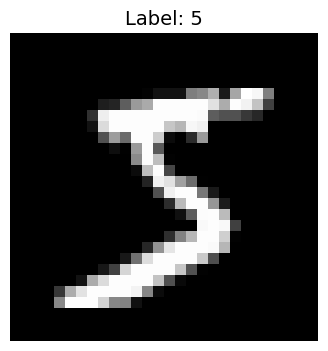

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
label = y_train[0]

plt.figure(figsize=(4, 4))
plt.imshow(image, cmap="gray")
plt.title(f"Label: {label}", fontsize=14)
plt.axis("off")
plt.show()

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [6]:
x_train.shape

(60000, 28, 28)

In [ ]:
import numpy as np

(60000, 784)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import idx2numpy

np.random.seed(7)

LEARNING_RATE = 0.01
EPOCHS = 20


def read_minist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    train_labels = np.unique(y_train)
    test_labels = np.unique(y_test)
    x_train = x_train.reshape(60000, 784)
    mean = np.mean(x_train)
    stddev = np.std(x_train)
    x_train = (x_train - mean) / stddev
    x_test = x_test.reshape(10000, 784)
    x_test = (x_test - mean) / stddev
    y_train = np.zeros((60000, 10))
    y_test = np.zeros((10000, 10))
    for i, y in enumerate(train_labels):
        y_train[i][y] = 1
    for i, y in enumerate(test_labels):
        y_test[i][y] = 1
    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = read_minist()

index_list = list(range(len(x_train)))

In [3]:
x_train.shape

(60000, 784)

In [4]:
def layer_w(neuron_count, input_count):
    weights = np.zeros((neuron_count, input_count + 1))
    for i in range(neuron_count):
        for j in range(1, (input_count + 1)):
            weights[i][j] = np.random.uniform(-0.1, 0.1)
    return weights

hidden_layer_w = layer_w(25, 784)
hidden_layer_y = np.zeros(25)
hidden_layer_error = np.zeros(25)

output_layer_w = layer_w(10, 25)
output_layer_y = np.zeros(10)
output_layer_error = np.zeros(10)

chart_x = []
chart_y_train = []
chart_y_test = []


def show_learning(epoch_no, train_acc, test_acc):
    global chart_x
    global chart_y_train
    global chart_y_test
    print(f"epoch no: {epoch_no} train_acc: {train_acc:6.4f} test_acc: {test_acc:6.4f}")
    chart_x.append(epoch_no + 1)
    chart_y_train.append(1.0 - train_acc)
    chart_y_test.append(1.0 - test_acc)


def plot_learning():
    plt.plot(chart_x, chart_y_train, "r-", label="training_error")
    plt.plot(chart_x, chart_y_test, "b-", label="test error")
    plt.axis([0, len(chart_x), 0.0, 1.0])
    plt.xlabel("training epochs")
    plt.ylabel("error")
    plt.legend()
    plt.show()


def forward_pass(x):
    global hidden_layer_y
    global output_layer_y

    for i, w in enumerate(hidden_layer_w):
        z = np.dot(w, x)
        hidden_layer_y[i] = np.tanh(z)
    hidden_output_array = np.concatenate((np.array([1.0]), hidden_layer_y))
    for i, w in enumerate(output_layer_w):
        z = np.dot(w, hidden_output_array)
        output_layer_y[i] = 1.0 / (1.0 + np.exp(-z))


def backward_pass(y_truth):
    global hidden_layer_error
    global output_layer_error

    for i, y in enumerate(output_layer_y):
        error_prime = -(y_truth[i] - y)
        derivate = y * (1.0 - y)
        output_layer_error[i] = error_prime * derivate
    for i, y in enumerate(hidden_layer_y):
        error_weights = []
        for w in output_layer_w:
            error_weights.append(w[i + 1])
        error_weight_array = np.array(error_weights)
        derivate = 1.0 - y**2
        weighted_error = np.dot(error_weight_array, output_layer_error)
        hidden_layer_error[i] = weighted_error * derivate


def adjust_weights(x):
    global output_layer_w
    global hidden_layer_w
    for i, error in enumerate(hidden_layer_error):
        hidden_layer_w[i] -= (x * LEARNING_RATE * error)
    hidden_output_array = np.concatenate((np.array([1.0]), hidden_layer_y))
    for i, error in enumerate(output_layer_error):
        output_layer_w[i] -= (hidden_output_array * LEARNING_RATE * error)


    

epoch no: 0 train_acc: 0.5897 test_acc: 0.6580
epoch no: 1 train_acc: 0.5877 test_acc: 0.6513
epoch no: 2 train_acc: 0.6011 test_acc: 0.6442
epoch no: 3 train_acc: 0.6205 test_acc: 0.6374
epoch no: 4 train_acc: 0.6018 test_acc: 0.6326
epoch no: 5 train_acc: 0.6173 test_acc: 0.6264
epoch no: 6 train_acc: 0.5881 test_acc: 0.6237
epoch no: 7 train_acc: 0.6132 test_acc: 0.6199
epoch no: 8 train_acc: 0.6053 test_acc: 0.6161
epoch no: 9 train_acc: 0.5892 test_acc: 0.6137
epoch no: 10 train_acc: 0.5602 test_acc: 0.6130
epoch no: 11 train_acc: 0.5546 test_acc: 0.6125
epoch no: 12 train_acc: 0.5862 test_acc: 0.6098
epoch no: 13 train_acc: 0.5703 test_acc: 0.6089
epoch no: 14 train_acc: 0.5799 test_acc: 0.6073
epoch no: 15 train_acc: 0.5909 test_acc: 0.6060
epoch no: 16 train_acc: 0.6033 test_acc: 0.6041
epoch no: 17 train_acc: 0.5554 test_acc: 0.6033
epoch no: 18 train_acc: 0.5530 test_acc: 0.6023
epoch no: 19 train_acc: 0.5931 test_acc: 0.6005


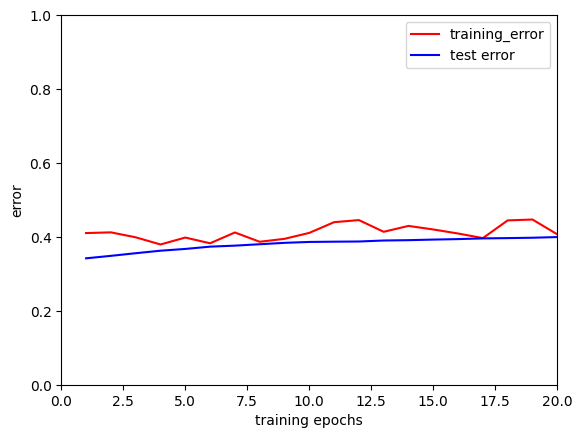

In [5]:
for i in range(EPOCHS):
    np.random.shuffle(index_list)
    correct_training_results = 0
    for j in index_list:
        x = np.concatenate((np.array([1.0]),x_train[j]))
        forward_pass(x)
        if output_layer_y.argmax() == y_train[j].argmax():
            correct_training_results += 1
        backward_pass(y_train[j])
        adjust_weights(x)
    correct_test_results = 0
    for j in range(len(x_test)):
        x = np.concatenate((np.array([1.0]),x_test[j]))
        forward_pass(x)
        if output_layer_y.argmax() == y_test[j].argmax():
            correct_test_results += 1
    show_learning(i,correct_training_results/len(x_train), correct_test_results/len(x_test))
plot_learning()